In [1]:
from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing()

import numpy as np

import matplotlib.pyplot as plt

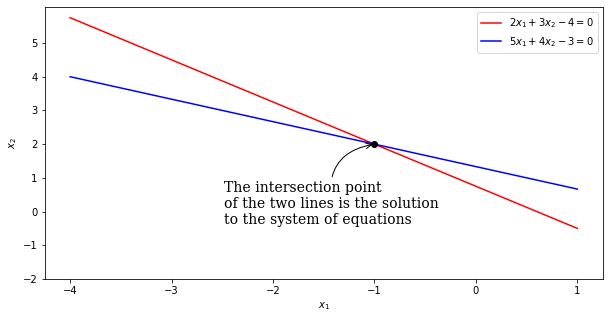

In [74]:
# Graphical solution

x = np.arange(-4, 2, 1)
x2 = np.arange(-2, 6, 1)

y1 = (4 - 2*x) / 3
y2 = (3 - 5*x) / 4

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("${x_1}$")
ax.set_ylabel("${x_2}$")

ax.plot(x, y2, 'r', label="$2{x_1}+3{x_2}-4=0$")
ax.plot(x, y1, 'b', label="$5{x_1}+4{x_2}-3=0$")

ax.plot(-1, 2, 'black', lw=5, marker='o')

ax.annotate("The intersection point\nof the two lines is the solution\nto the system of equations", fontsize=14, family="serif", xy=(-1, 2),
    xycoords="data", xytext=(-150, -80),
    textcoords="offset points", arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_xticks(x)
ax.set_yticks(x2)

ax.legend()

In [75]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

A.rank()

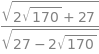

In [76]:
A.condition_number()

In [79]:
sympy.N(_)

In [80]:
A.norm()

In [82]:
# LU factorization

A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

L, U, _ = A.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [83]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [84]:
L * U == A

True

In [85]:
x = A.solve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [88]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
P, L, U = la.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [90]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [91]:
la.solve(A, b)

array([-1.,  2.])

In [96]:
# Symbolic vs Numerical
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
x = A.solve(b)
x

⎡2⋅p - 1 ⎤
⎢─────── ⎥
⎢ p - 1  ⎥
⎢        ⎥
⎢   1    ⎥
⎢────────⎥
⎢      1 ⎥
⎢-√p + ──⎥
⎣      √p⎦

Text(0.5, 0, '$p$')

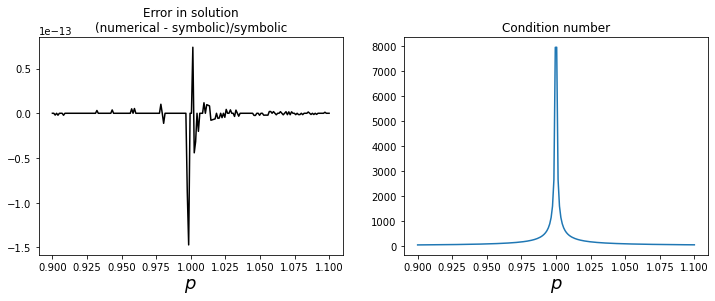

In [102]:
#Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

# Numerical problem specification
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

p_vec = np.linspace(0.9, 1.1, 200)

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])

axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)
